# Проверка гипотез по увеличению выручки в интернет-магазине


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

**Цель исследования:**
1) Приоритизировать гипотезы
2) Запуск А/В теста
3) Анализ результатов

**Ход исследования:**

**Часть 1 - приоритизация гипотез:**
1) Гипотезы по увеличению выручки интернет-магазина для приоритизации получу из датасета hypothesis.csv
2) Применю фреймворк ICE 
3) Применю фреймворк RICE

**Часть 2 - анализ А/В теста:**
1) Построю график кумулятивной выручки по группам
2) Построю график кумулятивного среднего чека по группам
3) Построю график относительного изменения кумулятивного среднего чека группы B к группе A
4) Построю график кумулятивного среднего количества заказов на посетителя по группам
5) Построю график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
6) Построю точечный график количества заказов по пользователям
7) Посчитаю 95-й и 99-й перцентили количества заказов на пользователя
8) Построю точечный график стоимостей заказов
9) Посчитаю 95-й и 99-й перцентили стоимости заказов
10) Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
11) Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
12) Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
13) Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
14) Приму решение по результатам теста

## 1. Приоритизация гипотез 

### 1.1 Знакомство с данными

In [1]:
import pandas as pd  # импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta

In [3]:
hypothesis=pd.read_csv('/Users/alena/Desktop/datasets/project_ab/hypothesis.csv')
#открываем файлы с данными для исследования

In [4]:
hypothesis.info() # ознакомимся со структурой таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
pd.set_option('display.max_colwidth', -1)
display(hypothesis['Hypothesis']) # выведем гипотезы на экран

/var/folders/wz/_xj2wb8s0fj1qgdwgh4cp1k80000gp/T/ipykernel_16400/2315510681.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей          
1    Запустить собственную службу доставки, что сократит срок доставки заказов                                   
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3    Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар         
4    Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                            
5    Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                    
6    Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию        
7    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок            
8    Запустить акцию, дающую скидку на товар в день рождения                            

In [6]:
hypothesis.columns = hypothesis.columns.str.lower() 
# приведем названия колонок к нижнему регистру

### 1.2 Применение фреймворков ICE  и RICE для приоритизации гипотез

In [7]:
# проведем приоритизацию по фреймворку ICE 
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [8]:
# проведем приоритизацию по фреймворку RICE 
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видно отличие в приоритизации при использовании фреймворков ICE и RICE. Фреймворк RICE учитывает параметр REACH - охват, поэтому больший скорринг получают гипотезы, применение которых задействует большее количество пользователей. При применении фреймворка RICE приоритетной получается гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

## 2. Анализ результатов А/В теста

### 2.1 Знакомство с данными

In [9]:
orders=pd.read_csv('/Users/alena/Desktop/datasets/project_ab/orders.csv')
visitors=pd.read_csv('/Users/alena/Desktop/datasets/project_ab/visitors.csv')
#открываем файлы с данными для исследования

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders.duplicated().sum() #проверка на явные дубликаты

0

In [13]:
orders.isna().sum() # сколько пропущено значений в каждом столбце

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
orders = orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})

В датафрейме Orders нет явных дубликатов и пропусков, текстовые разделители считываются корректно. Для дальнейшей работы с данными необходимо заменить типы данных на datetime в колонке 'date'.Также для удобcтва приведем названия колонок к нижнему регистру и добавим '_'. 

In [15]:
orders['date'] = pd.to_datetime(orders['date'])

In [16]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors.duplicated().sum() #проверка на явные дубликаты

0

In [20]:
visitors.isna().sum() #есть ли пропуски в данных

date        0
group       0
visitors    0
dtype: int64

In [21]:
visitors['date'] = pd.to_datetime(visitors['date']) #изменим тип данных

В датафрейме visitors нет явных дубликатов и пропусков, текстовые разделители считываются корректно. Для дальнейшей работы с данными были заменены типы данных на datetime в колонке 'date'.

Далее для корректной интерпретации результатов проведенного А/В теста необходимо проверить полученные данные: нет ли пользователей, попавших в обе группы.

In [22]:
duplicates = np.intersect1d(orders[orders['group']=='A']['visitor_id'], orders[orders['group']=='B']['visitor_id'])
print ('Пользователей, попавших в обе группы:', len(duplicates))

Пользователей, попавших в обе группы: 58


Теперь посчитаем, какой процент от общего количества составляют дубли:

In [23]:
visitors_total = orders['visitor_id'].nunique()
print('Всего пользователей в эксперименте: ', visitors_total,'\n'
     'Процент дублирующихся от общего количества:', round(len(duplicates)/visitors_total*100, 2))

Всего пользователей в эксперименте:  1031 
Процент дублирующихся от общего количества: 5.63


Для того, чтобы интерпретировать результаты верно, удалим пользователей, попавших в обе группы.

In [24]:
orders = orders.query('visitor_id not in @duplicates')

### 2.2 График кумулятивной выручки по группам

In [25]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


Построим графики кумулятивной выручки по дням и группам А/В тестирования:

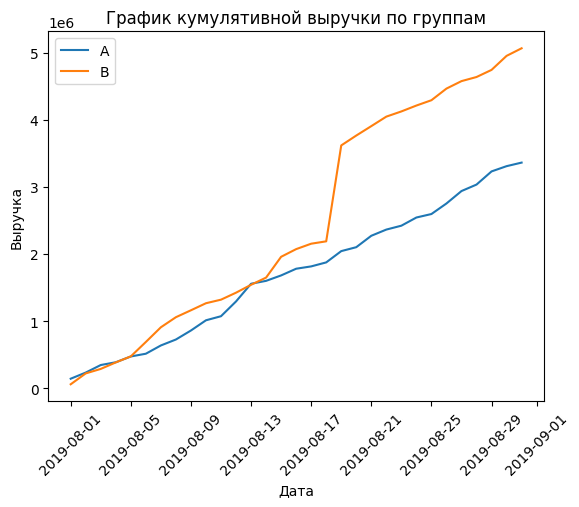

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

На графике видно, что выручка стабильно растет. Однако, в некоторых точках виден резкий рост у группы В. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.


### 2.3 График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

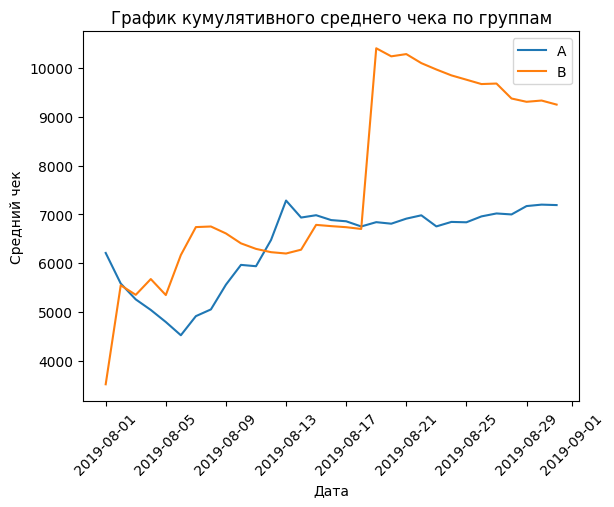

In [27]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

На графике мы видим резкие изменения в среднем чеке группы В, это может быть связано с выбросами и аномалиями. Также можно увидеть, что по кумулятивным метрикам на конец исследуемого периода средний чек группы В сильно выше группы А.

### 2.4 График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека:

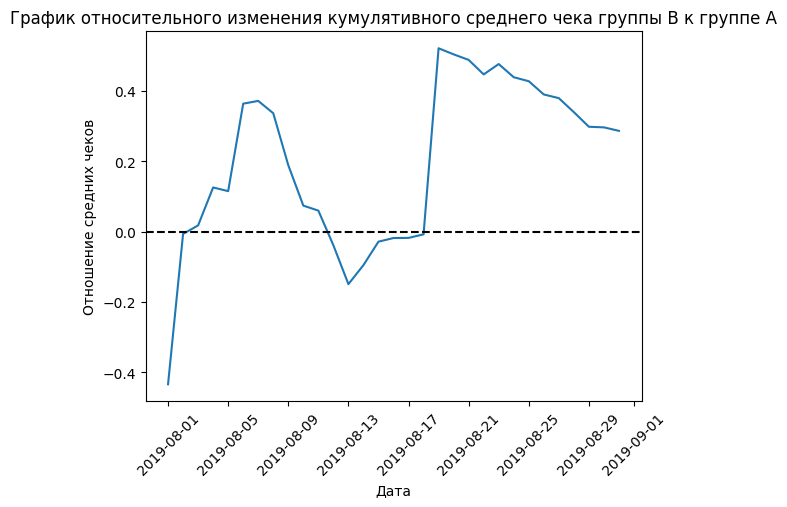

In [28]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.show()

Видны резкие скачки графика в некоторых местах. Это может быть связано с аномальными значениями.

### 2.5 График кумулятивного среднего количества заказов на посетителя по группам

Аналогично проанализируем график кумулятивной конверсии.

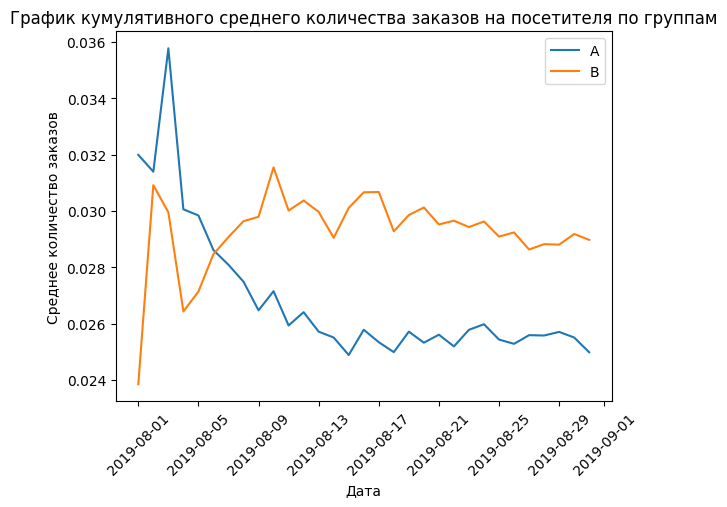

In [29]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.show()


На графике видно различие между средним количеством заказов в группах А и В. В обеих группах во второй половине эксперимента показатель немного снижается. Отчетливо видны скачки в графике, это может говорить о наличии аномальных значений в данных.

### 2.6 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Построим график относительного различия кумулятивных конверсий:

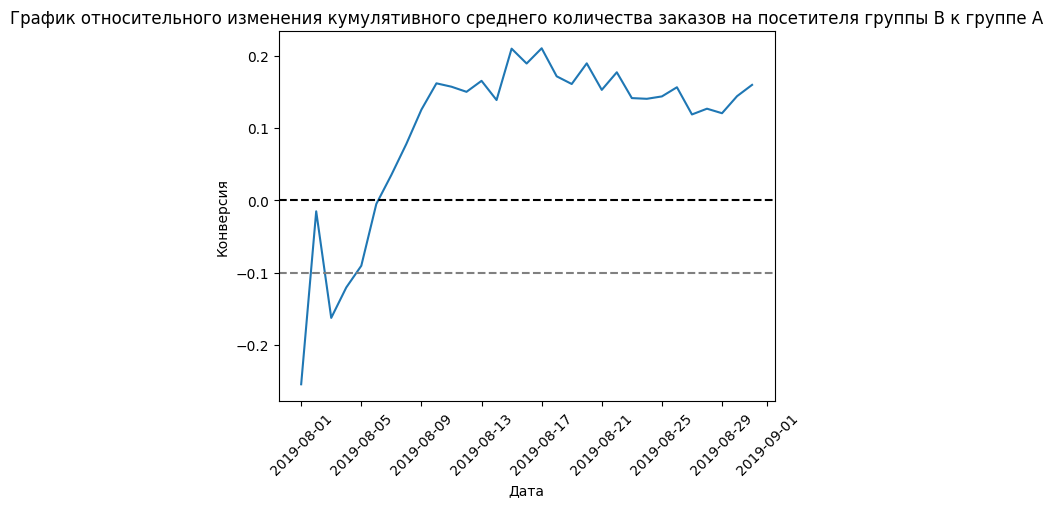

In [30]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()


На графике виден быстрый рост кумулятивного среднего количества заказов на посетителя группы В к группе Ав первой половине эксперимента и небольшое снижение показателя во второй половине. Для более точного анализа необходимо исследовать аномалии.

### 2.7 Точечный график количества заказов по пользователям

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. 
Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [31]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

        user_id  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


Построим точечную диаграмму числа заказов на одного пользователя:

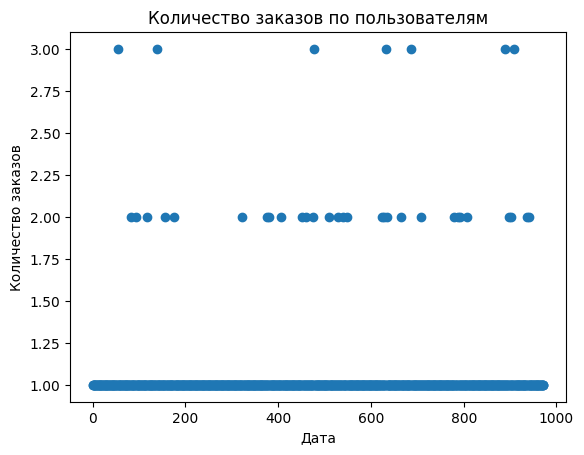

In [32]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Есть пользователи, совершившие 2 и 3 заказа. Для более точного исследования аномалий посчитаем 99 и 95й перцентили количества заказов на пользователя:

In [33]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей сделали больше 1 и не более 1% сделали больше 2х заказов. Разумно будет выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов и отсеять аномальных пользователей по ней.

### 2.8 Точечный график стоимостей заказов

Построим точечную диаграмму распределения стоимостей заказов:

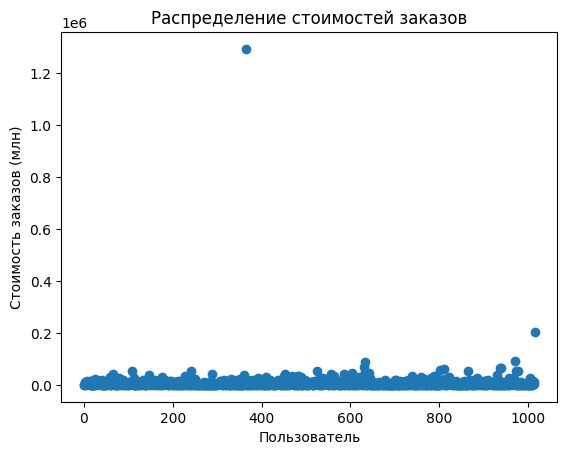

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимостей заказов')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказов (млн)')
plt.show()

In [35]:
print(orders['revenue'].sort_values(ascending = False).head(10))

425     1294500
1196    202740 
1136    92550  
744     86620  
743     67990  
1103    66350  
1099    65710  
949     60450  
940     58550  
131     53904  
Name: revenue, dtype: int64


На графике отчетливо видны выбросы по соимости заказов на пользователя. Для дальнейшего исследования аномалий посчитаем 99 и 95й перцентили стоимости заказов на пользователя:

In [36]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


В данных не более 5% заказов стоимостью 26785 и не более 53904. Разумно будет выбрать стоимость заказов 26785 за верхнюю границу числа заказов и отсеять аномальных пользователей по ней.

### 2.9 Анализ результатов А/В теста

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на пользователя между группами нет. Альтернативная: различия в среднем между группами есть.

In [37]:
# подготовим данные


visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  orders_per_date_a  revenue_per_date_a  orders_per_date_b  \
0 2019-08-01  23                 142779              17                  
1 2019-08-02  19                 91602               22                  
2 2019-08-03  24                 112473              14                  
3 2019-08-04  11                 41176               13                  
4 2019-08-05  22                 86383               21                  

   revenue_per_date_b  orders_cummulative_a  revenue_cummulative_a  \
0  59758               23                    142779                  
1  162043              42                    234381                  
2  67049               66                    346854                  
3  96890               77                    388030                  
4  89908               99                    474413                  

   orders_cummulative_b  revenue_cummulative_b  visitors_per_date_a  \
0  17                    59758                  719            

Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [38]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [39]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой. Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [40]:
print('P-value:', "{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительный прирост среднего числа заказов группы В:', "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))
 

P-value: 0.011
Относительный прирост среднего числа заказов группы В: 0.160


P-value меньше 0,05 - можно отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Относительный прирост среднего числа заказов группы В составил 16%.

Вывод: По "сырым" данным наблюдаются статистические различия между средним числом заказов в группах А и В. 

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. А также вычислим относительные различия в среднем чеке между группами:

In [40]:
print('P-value:', 
      '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы В:', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительный прирост среднего чека группы В: 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Это говорит о том, что выявленные различия не значимы, могут быть получены случайно из-за единичных выбросов.

Найденные ранее 95-й и 99-й перцентили средних чеков равны 26785 и 53904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26785 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 26785 — users_with_expensive_orders. Объединим их в таблице abnormal_users. 

In [ ]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 26785]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0])

Всего 58 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [47]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на пользователя между группами нет. Альтернативная: различия в среднем между группами есть.

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [48]:
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост среднего числа заказов группы В:', 
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

P-value: 0.012
Относительный прирост среднего числа заказов группы В: 0.182


Вывод: результаты по среднему количеству заказов практически не изменились. 

Рассмотрим изменения по среднему чеку:

Сформулируем гипотезы. Нулевая: различий в размере среднего чека между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [49]:
print(
    'P-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост среднего чека группы В',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.646
Относительный прирост среднего чека группы В -0.048


Небольшое снижение p-value, однако, остается сильно выше 0.05, это значит, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия после "очистки" данных нет. Интересно отметить, что в абсолютном выражении средний чек в группе В снизился по отношению к группе А в "очищенных" данных.

### 2.10 Решение по результатам теста

По проведенному А/В тесту можно сделать следующие выводы:

1) Есть статистически значимое различие по относительному числу прироста заказов между группами как по сырым данным, так и после фильтрации аномалий.
2) Ни по сырым данным, ни после фильтрации нет статистически значимого различия по среднему чеку между группами.
3) График кумулятивного роста количества заказов показывает явное примущество у группы В по их количеству.

На основании этих выводов можно принять решение о прекращении тестирования и признать эксперимент удачным, так как обнаружено положительное влияние нововведений на среднее число заказов пользователей.